# Big Data Group Project: Functional Map of the World

## Purpose of this notebook: To evaluate how countries prioritize Food Manufacturing/Farming and Power/Energy Industry relative to one another

In [27]:
# import the data and relevant libraries
import pandas as pd
import ast

data=pd.read_csv("../datasets/groundtruthdatamsrgbtrainval.csv")

data.head()

,Unnamed: 0,img_filename,bounding_boxes,gsd,img_width,img_height,mean_pixel_height,mean_pixel_width,utm,country_code,...,off_nadir_angle_start_dbl,off_nadir_angle_end_dbl,off_nadir_angle_min_dbl,off_nadir_angle_max_dbl,catalog_id,sensor_platform_name,raw_location,spatial_reference,epsg,abs_cal_factors
0,0,fountain_514_1_ms.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",1.873781,245,166,0.000018,0.000018,32T,CHE,...,19.256790,24.403067,19.256790,24.403067,105041000048BE00,GEOEYE01,POLYGON ((8.5808360117899998 47.44751609250000...,GCS_WGS_1984,4326,"[{'band': 'blue', 'value': 0.0150102}, {'band'..."
1,1,fountain_514_0_ms.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",2.192168,228,155,0.000020,0.000020,32T,CHE,...,22.788811,25.131763,22.788811,25.131763,1030010020204900,WORLDVIEW02,POLYGON ((8.5808360117899998 47.44751609250000...,GCS_WGS_1984,4326,"[{'band': 'coastal', 'value': 0.009295654}, {'..."
2,2,fountain_726_5_ms.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",2.222167,227,205,0.000020,0.000020,17R,USA,...,25.423967,26.907818,24.740011,26.907818,1030010065AFD800,WORLDVIEW02,"POLYGON ((-80.250062688200003 26.3062027036, -...",GCS_WGS_1984,4326,"[{'band': 'coastal', 'value': 0.009295654}, {'..."
3,3,fountain_726_7_ms.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",1.537864,326,294,0.000014,0.000014,17R,USA,...,27.138063,28.703564,27.138063,28.703564,104001002C462200,WORLDVIEW03_VNIR,"POLYGON ((-80.250062688200003 26.3062027036, -...",GCS_WGS_1984,4326,"[{'band': 'nir', 'value': 0.0166926}, {'band':..."
4,4,fountain_726_6_ms.tif,"[{'raw_category': 'Fountain', 'category': 'fou...",1.401362,356,321,0.000013,0.000013,17R,USA,...,22.079554,20.975574,20.975574,22.079554,1040010024086400,WORLDVIEW03_VNIR,"POLYGON ((-80.250062688200003 26.3062027036, -...",GCS_WGS_1984,4326,"[{'band': 'nir', 'value': 0.0117971}, {'band':..."


In [28]:
# extract relevant information from the dataframe
categorical_items = []
for img in data[['bounding_boxes']].values:
    correct_list = ast.literal_eval(img[0])
    categorical_items.append(correct_list[0]['raw_category'])

# Add New Row
data['category'] = pd.Series(categorical_items)

In [29]:
category_df = data[['country_code', 'category']].copy()

In [30]:
food_prod = ["Crop Field Orchard","Crop Field Rice","Crop Field Corn","Crop_Field_General","Crop Field Barley",
             "Crop Field Wheat","Crop Field Vineyard","Crop Field Coffee","Crop Field Flowers",
             "Crop Field Tea","Aquaculture"]

energy_prod=["Nuclear Powerplant","Wind Farm","Factory/Powerplant","Solar Farm"]

food_df=category_df[category_df['category'].isin(food_prod)]
energy_df=category_df[category_df['category'].isin(energy_prod)]


In [31]:
food_df.head()

,country_code,category
133425,PHL,Aquaculture
133426,PHL,Aquaculture
133427,PHL,Aquaculture
133428,PHL,Aquaculture
133429,PHL,Aquaculture


In [32]:
energy_df.head()

,country_code,category
26093,SVN,Nuclear Powerplant
26094,SVN,Nuclear Powerplant
26095,USA,Nuclear Powerplant
26096,USA,Nuclear Powerplant
26097,USA,Nuclear Powerplant


In [33]:
#get frequency of each category by country
food_count=pd.DataFrame(food_df['country_code'].value_counts())
energy_count=pd.DataFrame(energy_df['country_code'].value_counts())

In [34]:
food_count.head()

,country_code
FRA,8296
ITA,7997
PHL,1743
USA,1420
SVN,675


In [35]:
energy_count.head()

,country_code
CHN,2526
USA,2341
ITA,1722
IND,1407
DEU,1136


In [36]:
food_count.reset_index(inplace=True)
food_count=food_count.rename(columns={'country_code':'Food Production Frequency','index':'country_code'})

In [37]:
energy_count.reset_index(inplace=True)
energy_count=energy_count.rename(columns={'country_code':'Energy Production Frequency','index':'country_code'})

In [38]:
food_count.head()

,country_code,Food Production Frequency
0,FRA,8296
1,ITA,7997
2,PHL,1743
3,USA,1420
4,SVN,675


In [39]:
energy_count.head()

,country_code,Energy Production Frequency
0,CHN,2526
1,USA,2341
2,ITA,1722
3,IND,1407
4,DEU,1136


In [40]:
total_df=food_count.merge(energy_count, on='country_code',how='inner')
total_df.head()

,country_code,Food Production Frequency,Energy Production Frequency
0,FRA,8296,799
1,ITA,7997,1722
2,PHL,1743,22
3,USA,1420,2341
4,SVN,675,30


## Analysis of Data

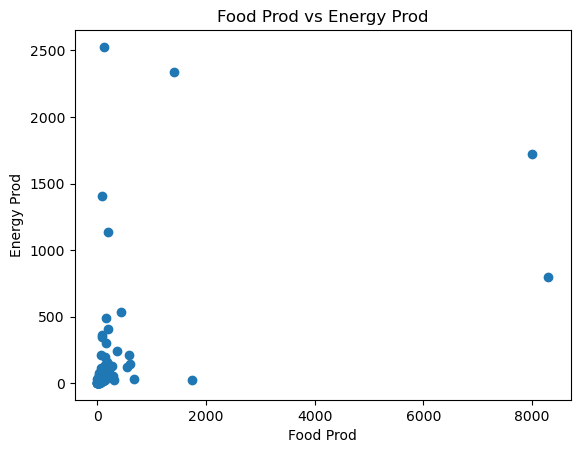

In [41]:
import matplotlib.pyplot as plt

plt.scatter(total_df["Food Production Frequency"],total_df["Energy Production Frequency"])
plt.title("Food Prod vs Energy Prod")
plt.xlabel("Food Prod")
plt.ylabel("Energy Prod")
plt.show()

In [42]:
print("Correlation between Food and Energy Production in countries is :",
      total_df["Food Production Frequency"].corr(total_df["Energy Production Frequency"]))

Correlation between Food and Energy Production in countries is : 0.4391783825063916


<AxesSubplot:xlabel='Food Production Frequency', ylabel='Energy Production Frequency'>

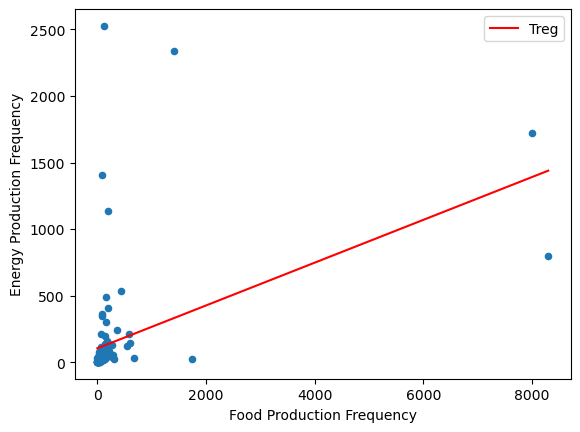

In [65]:
import numpy as np

d= np.polyfit(total_df["Food Production Frequency"],total_df["Energy Production Frequency"],1)
f=np.poly1d(d)

total_df.insert(3,'Treg',f(total_df["Food Production Frequency"]))
ax = total_df.plot.scatter(x = 'Food Production Frequency',y='Energy Production Frequency')
total_df.plot(x='Food Production Frequency', y='Treg',color='Red',ax=ax)